In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from triangulation_finder import *

In [2]:
print(mesh_convention)


CONVENTION
vertices = [[x1, x2, x3, ..., xd],
            [x1, x2, x3, ..., xd],
            [x1, x2, x3, ..., xd],
            [x1, x2, x3, ..., xd], ... ]
vertices.dtype = float

vertices are assumed to be embedded in
a d-dimensional Euclidean space

a ---- b
edges = [[vert_a1, vert_b1],
         [vert_a2, vert_b2],
         [vert_a3, vert_b3], ... ]
with the convention vert_a < vert_b
edges.dtype = int

by vert_a1, vert_b2, etc., we mean the corresponding
INDEX of the vertices array, not the coordinates

        c
       /\
      /  \
     /____\
    a      b
triangles = [[vert_a1, vert_b1, vert_c1, edg_ab1, edg_bc1, edg_ca1],
             [vert_a2, vert_b2, vert_c2, edg_ab2, edg_bc2, edg_ca2],
             [vert_a3, vert_b3, vert_c3, edg_ab3, edg_bc3, edg_ca3], ... ]
with the convention that vert_a < vert_b and vert_a < vert_c
triangles.dtype = int

by vert_a1, vert_b2, etc., we mean the corresponding
INDEX of the vertices array, not the coordinates

by edg_ab1, edg_ca3, etc., we 

Starting manifold mesh relaxation.

The manifold mesh has been successfully relaxed after 51 steps.

Calculating distances between vertices.

Starting mesh triangulation with vertex 93.



<IPython.core.display.Javascript object>


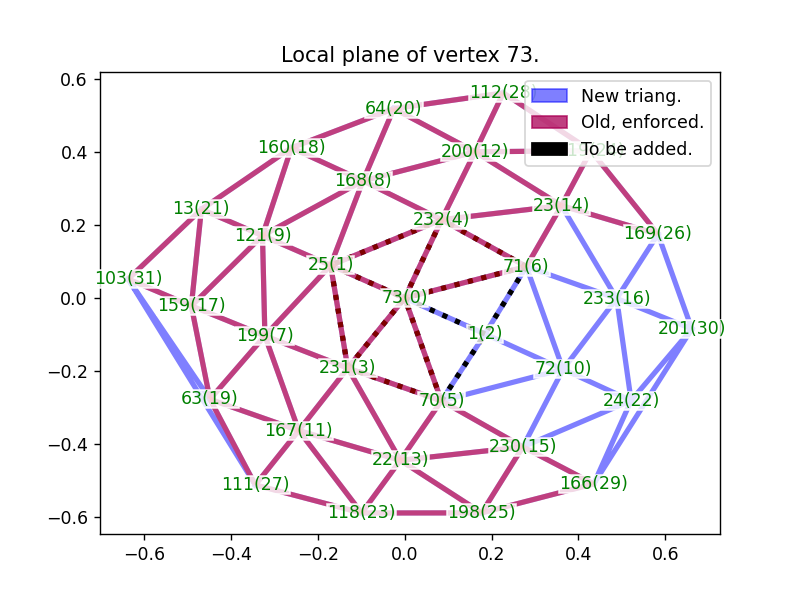

LinAlgError: "SVD did not converge" occurred at vertex 70.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 258.

The manifold is orientable.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 258.
Number of edges: 768.
Number of triangles: 512.
Euler characteristic = vertices - edges + triangles = 2.
Number of holes = 0.
Genus = (2 - Euler char. - holes) / 2 = 0 (for orientable surfaces only).
Calculating distances between vertices.

Starting mesh triangulation with vertex 93.



<IPython.core.display.Javascript object>

LinAlgError: "SVD did not converge" occurred at vertex 70.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 258.

The manifold is orientable.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 258.
Number of edges: 768.
Number of triangles: 512.
Euler characteristic = vertices - edges + triangles = 2.
Number of holes = 0.
Genus = (2 - Euler char. - holes) / 2 = 0 (for orientable surfaces only).


<IPython.core.display.Javascript object>


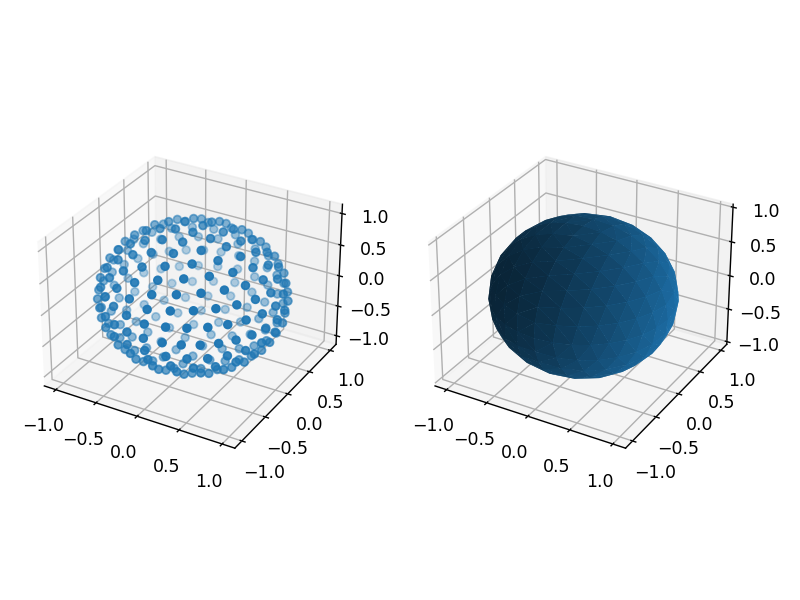

In [3]:
# sphere test
vert, _, _ = create_sphere(refine=3)
vert, edg, triag, _ = triangulation_finder(vert, init=93, to_plot=True, plot_3D=False, plot_index=73)
vert, edg, triag, _ = triangulation_finder(vert, init=93, to_plot=True, plot_3D=True, plot_index=73)

fig1 = plt.figure(tight_layout=True)
ax = fig1.add_subplot(1, 2, 1, projection='3d')
ax.scatter(vert[:,0], vert[:,1], vert[:,2])
ax = fig1.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(vert[:,0], vert[:,1], vert[:,2], triangles=triag[:,0:3])
plt.show()

Calculating distances between vertices.

Starting mesh triangulation with vertex 25.

LinAlgError: "SVD did not converge" occurred at vertex 25.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 800.

The manifold is orientable.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 800.
Number of edges: 2400.
Number of triangles: 1600.
Euler characteristic = vertices - edges + triangles = 0.
Number of holes = 0.
Genus = (2 - Euler char. - holes) / 2 = 1 (for orientable surfaces only).


<IPython.core.display.Javascript object>


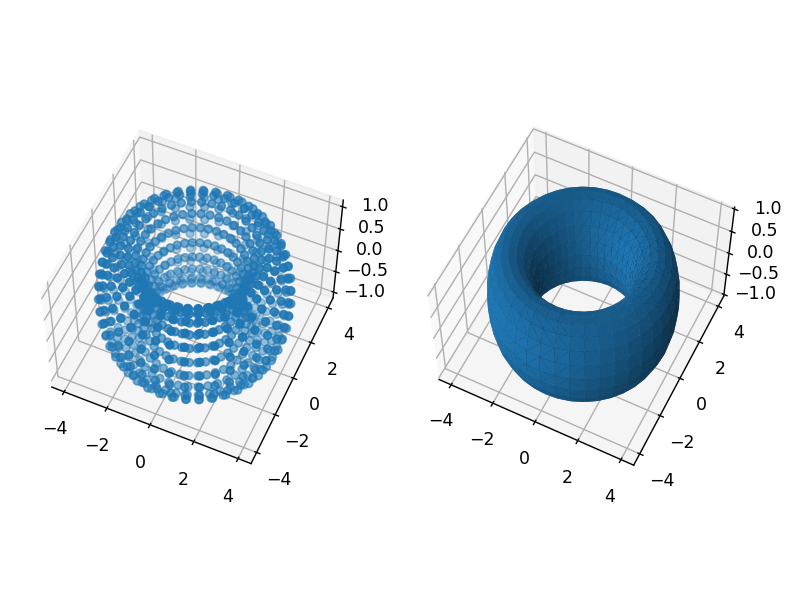

In [4]:
# torus test
u = np.linspace(0.0, 2.0 * np.pi, 40, endpoint=False)
v = np.linspace(0.0, 2.0 * np.pi, 20, endpoint=False)
u, v = np.meshgrid(u, v)
u = u.ravel()
v = v.ravel()
x = (3.0 + np.cos(v)) * np.cos(u)
y = (3.0 + np.cos(v)) * np.sin(u)
z = np.sin(v)
vert = np.transpose([x, y, z])

vert, edg, triag, other = triangulation_finder(vert)

fig1 = plt.figure(tight_layout=True)
ax = fig1.add_subplot(1, 2, 1, projection='3d')
ax.scatter(vert[:,0], vert[:,1], vert[:,2], antialiased=True)
ax = fig1.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(vert[:,0], vert[:,1], vert[:,2], triangles=triag[:,0:3])
plt.show()

Calculating distances between vertices.

Starting mesh triangulation with vertex 720.

LinAlgError: "SVD did not converge" occurred at vertex 720.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 800.

The manifold is not orientable.
In particular, there has been a conflict in giving an orientation to 40 triangles.
An array of these triangles shall be returned as 'orientation_conflicts'.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 800.
Number of edges: 2400.
Number of triangles: 1600.
Euler characteristic = vertices - edges + triangles = 0.
Number of holes = 0.
Non-orientable genus = 2 - Euler char. - holes = 2 (for non-orientable surfaces only).


<IPython.core.display.Javascript object>


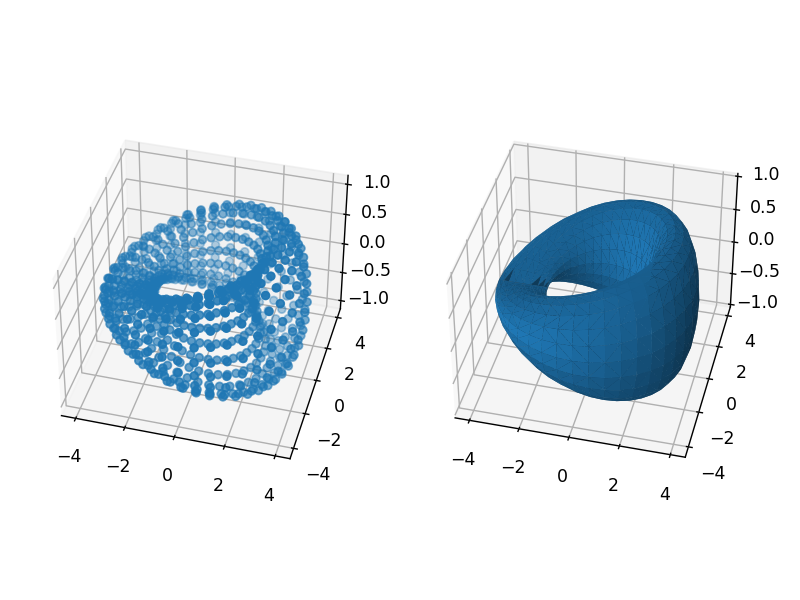

In [5]:
# Klein bottle test
u = np.linspace(0.0, 2.0 * np.pi, 40, endpoint=False)
v = np.linspace(0.0, 2.0 * np.pi, 20, endpoint=False)
u, v = np.meshgrid(u, v)
u = u.ravel()
v = v.ravel()
x = (3.0 + np.cos(v)) * np.cos(u)
y = (3.0 + np.cos(v)) * np.sin(u)
z = np.sin(v) * np.cos(0.5 * u)
w = np.sin(v) * np.sin(0.5 * u)
vert = np.transpose([x, y, z, w])

vert, edg, triag, other = triangulation_finder(vert)

fig1 = plt.figure(tight_layout=True)
ax = fig1.add_subplot(1, 2, 1, projection='3d')
ax.scatter(vert[:,0], vert[:,1], vert[:,2], antialiased=True)
ax = fig1.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(vert[:,0], vert[:,1], vert[:,2], triangles=triag[:,0:3])
plt.show()

Starting manifold mesh relaxation.

The manifold mesh has been successfully relaxed after 250 steps.



<IPython.core.display.Javascript object>

Calculating distances between vertices.

Starting mesh triangulation with vertex 1237.

LinAlgError: "SVD did not converge" occurred at vertex 1237.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 2049.

The manifold is not orientable.
In particular, there has been a conflict in giving an orientation to 107 triangles.
An array of these triangles shall be returned as 'orientation_conflicts'.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 2049.
Number of edges: 6144.
Number of triangles: 4096.
Euler characteristic = vertices - edges + triangles = 1.
Number of holes = 0.
Non-orientable genus = 2 - Euler char. - holes = 1 (for non-orientable surfaces only).


<IPython.core.display.Javascript object>


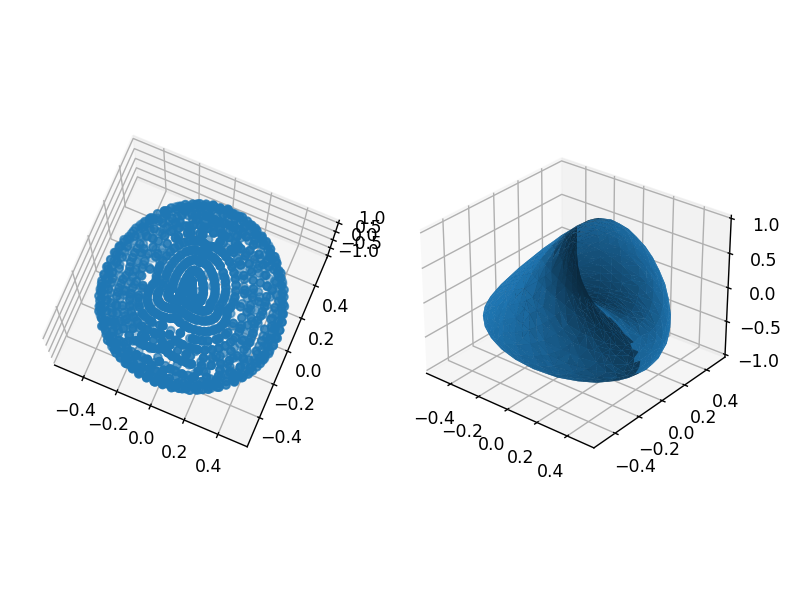

In [6]:
# real projective plane test

# a half sphere is needed for the parameterization
vert, edg, triag = create_sphere(refine=4, min_avg_force=1e-6)
vert, _, _ = refine_mesh(vert, edg, triag)

size = vert.shape[0]
half_sphere = list()
ignore = np.full((size), False, dtype=bool)
for i in range(size):
    if ignore[i]:
        continue
    ignore[i] = True
    half_sphere.append(vert[i])
    
    diff = vert[~ignore,:] - vert[i]
    dist = np.sqrt(np.sum(diff*diff, axis=1))
    if dist.size > 0:
        min_j = np.argmin(dist)        
        ignore[np.where(~ignore)[0][min_j]] = True
vert = np.array(half_sphere)

vert[vert[:,0] < 0.0] = - vert[vert[:,0] < 0.0]
vert[(vert[:,0] < 0.08) & (vert[:,1] < 0)] = - vert[(vert[:,0] < 0.08) & (vert[:,1] < 0)]

fig1 = plt.figure(tight_layout=True)
ax = fig1.add_subplot(1, 1, 1, projection='3d')
ax.scatter(vert[:,0], vert[:,1], vert[:,2])
plt.show()

x, y, z = np.transpose(vert)
# https://mathcurve.com/surfaces.gb/veronese/veronese.shtml
vert = np.transpose([x*y, y*z, z*x, x*x, y*y, z*z]) # 6D embedding of real projective plane

vert, edg, triag, other = triangulation_finder(vert)

fig2 = plt.figure(tight_layout=True)
ax = fig2.add_subplot(1, 2, 1, projection='3d')
ax.scatter(vert[:,1], vert[:,2], vert[:,3]-vert[:,5], antialiased=True)
ax = fig2.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(vert[:,1], vert[:,2], vert[:,3]-vert[:,5], triangles=triag[:,0:3])
plt.show()

Calculating distances between vertices.

Starting mesh triangulation with vertex 44.

LinAlgError: "SVD did not converge" occurred at vertex 44.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 400.

The manifold is orientable.

The manifold has a boundary and therefore is not closed (= compact and without boundary).
In particular, there are 2 boundary lines (= number of holes) present.
A list of arrays of these boundary lines shall be returned as 'boundary_lines'.

Number of vertices: 400.
Number of edges: 1120.
Number of triangles: 720.
Euler characteristic = vertices - edges + triangles = 0.
Number of holes = 2.
Genus = (2 - Euler char. - holes) / 2 = 0 (for orientable surfaces only).


<IPython.core.display.Javascript object>


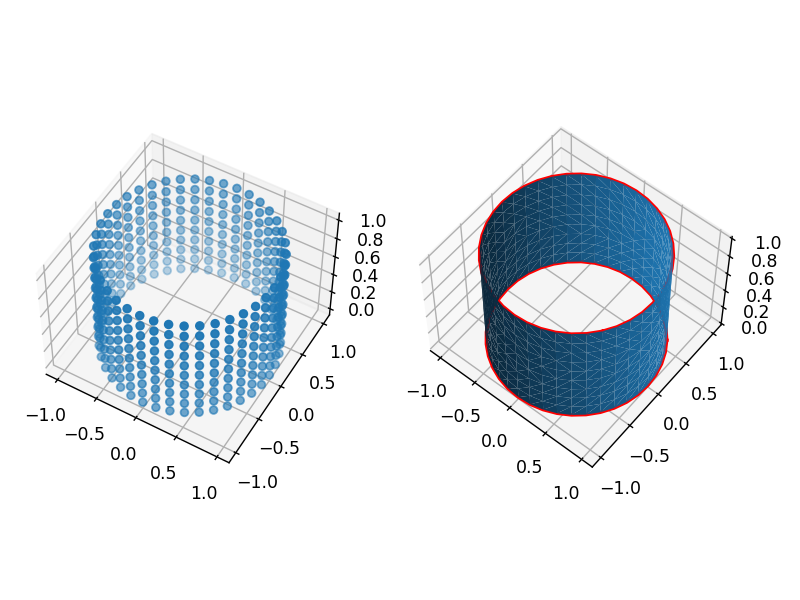

In [7]:
# cylinder test
u = np.linspace(0.0, 2.0 * np.pi, 40, endpoint=False)
z = np.linspace(0.0, 1.0, 10, endpoint=True)
u, z = np.meshgrid(u, z)
u = u.ravel()
z = z.ravel()
x, y = np.cos(u), np.sin(u)
vert = np.transpose([x, y, z])

vert, edg, triag, other = triangulation_finder(vert)

fig1 = plt.figure(tight_layout=True)
ax = fig1.add_subplot(1, 2, 1, projection='3d')
ax.scatter(vert[:,0], vert[:,1], vert[:,2], antialiased=True)
ax = fig1.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(vert[:,0], vert[:,1], vert[:,2], triangles=triag[:,0:3])
for bl in other["boundary_lines"]:
    ax.plot(vert[bl][:,0], vert[bl][:,1], vert[bl][:,2], "r-", lw=2)
plt.show()

Calculating distances between vertices.

Starting mesh triangulation with vertex 211.

LinAlgError: "SVD did not converge" occurred at vertex 211.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 500.

The manifold is not orientable.
In particular, there has been a conflict in giving an orientation to 18 triangles.
An array of these triangles shall be returned as 'orientation_conflicts'.

The manifold has a boundary and therefore is not closed (= compact and without boundary).
In particular, there are 1 boundary lines (= number of holes) present.
A list of arrays of these boundary lines shall be returned as 'boundary_lines'.

Number of vertices: 500.
Number of edges: 1400.
Number of triangles: 900.
Euler characteristic = vertices - edges + triangles = 0.
Number of holes = 1.
Non-orientable genus = 2 - Euler char. - holes = 1 (for non-orientable surfaces only).


<IPython.core.display.Javascript object>


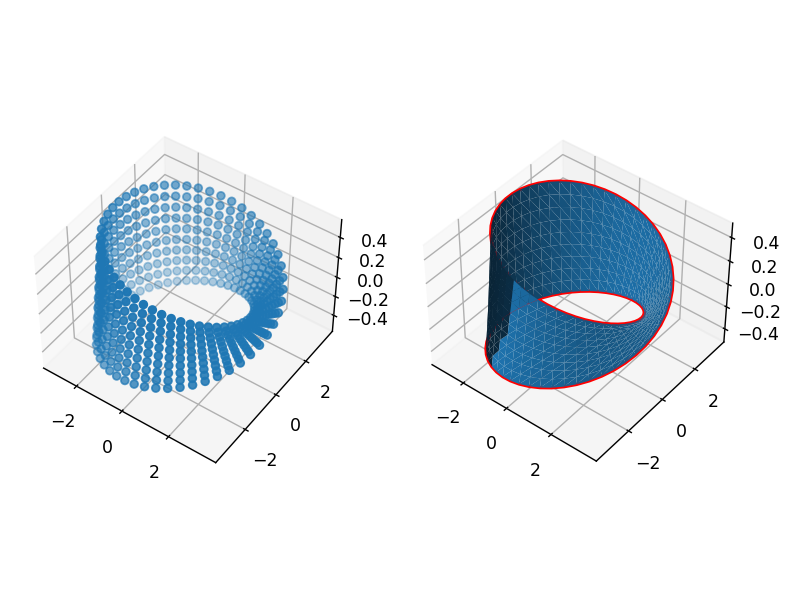

In [8]:
# Moebius strip test
u = np.linspace(0.0, 2.0 * np.pi, 50, endpoint=False)
v = np.linspace(-1.0, 1.0, 10, endpoint=True)
u, v = np.meshgrid(u, v)
u = u.ravel()
v = v.ravel()
x = (3.0 + 0.5 * v * np.cos(0.5 * u)) * np.cos(u)
y = (3.0 + 0.5 * v * np.cos(0.5 * u)) * np.sin(u)
z = 0.5 * v * np.sin(0.5 * u)
vert = np.transpose([x, y, z])

vert, edg, triag, other = triangulation_finder(vert)

fig1 = plt.figure(tight_layout=True)
ax = fig1.add_subplot(1, 2, 1, projection='3d')
ax.scatter(vert[:,0], vert[:,1], vert[:,2], antialiased=True)
ax = fig1.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(vert[:,0], vert[:,1], vert[:,2], triangles=triag[:,0:3])
for bl in other["boundary_lines"]:
    ax.plot(vert[bl][:,0], vert[bl][:,1], vert[bl][:,2], "r-", lw=2)
plt.show()

Calculating distances between vertices.

Starting mesh triangulation with vertex 173.



<IPython.core.display.Javascript object>


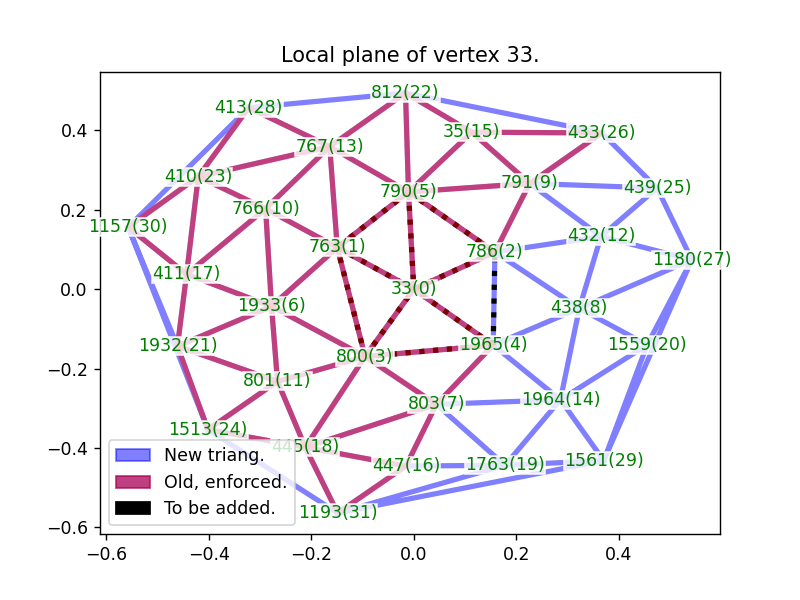

LinAlgError: "SVD did not converge" occurred at vertex 791.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 2004.

The manifold is orientable.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 2004.
Number of edges: 6012.
Number of triangles: 4008.
Euler characteristic = vertices - edges + triangles = 0.
Number of holes = 0.
Genus = (2 - Euler char. - holes) / 2 = 1 (for orientable surfaces only).


(array([[ 0.99758468,  0.05392414, -0.04378337, ..., -0.5563645 ,
         -0.82715216, -0.07923282],
        [ 0.99925189,  0.02177495,  0.031961  , ..., -0.60368591,
         -0.79522138,  0.05644713],
        [ 0.9993074 ,  0.01207125, -0.03519954, ..., -0.64955253,
          0.75792597, -0.06024726],
        ...,
        [-0.62769785, -0.71481096,  0.30828673, ..., -0.61986216,
          0.72087061,  0.31002656],
        [-0.66160195, -0.62687613,  0.41147197, ...,  0.96843019,
         -0.03267372,  0.24713438],
        [-0.62149615, -0.7148289 ,  0.3205654 , ...,  0.98276168,
          0.00108514,  0.18487375]]),
 array([[173, 174],
        [174, 651],
        [173, 651],
        ...,
        [329, 356],
        [329, 365],
        [329, 357]]),
 array([[ 173,  174,  651,    0,    1,    2],
        [ 158,  173,  651,    3,    2,    4],
        [ 158,  178,  173,    5,    6,    3],
        ...,
        [ 358,  367,  359, 6008, 5992, 6001],
        [ 329,  357,  365, 6011, 6000, 60

In [9]:
triangulation_finder(np.loadtxt("gs_mesh_for_kappa_0.307.txt"), init=173, to_plot=True, plot_3D=False, plot_index=33)

Calculating distances between vertices.

Starting mesh triangulation with vertex 173.



<IPython.core.display.Javascript object>


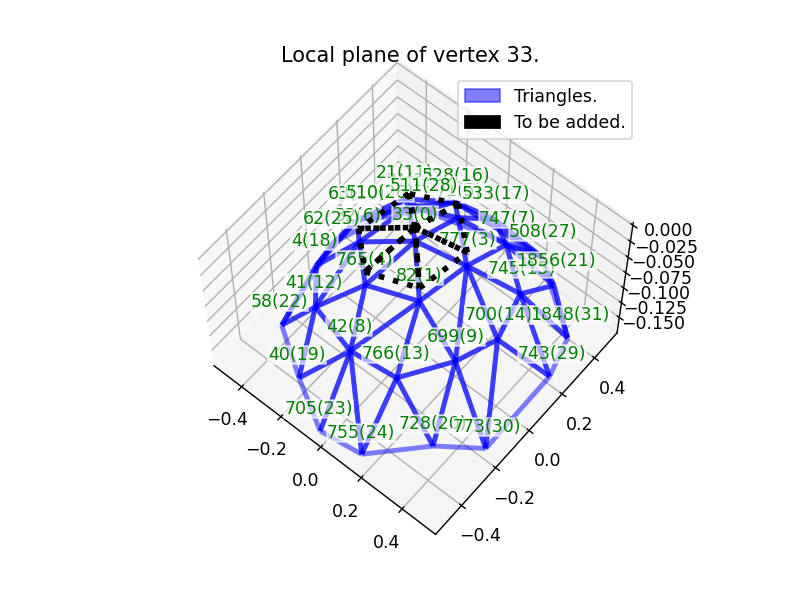

LinAlgError: "SVD did not converge" occurred at vertex 738.
Trying again...

Mesh successfully triangulated.
All edges are adjacent to two or less triangles.

The mesh is connected and has only one part of size 1992.

The manifold is orientable.

The manifold does not have a boundary and is therefore closed (= compact and without boundary).

Number of vertices: 1992.
Number of edges: 5976.
Number of triangles: 3984.
Euler characteristic = vertices - edges + triangles = 0.
Number of holes = 0.
Genus = (2 - Euler char. - holes) / 2 = 1 (for orientable surfaces only).


(array([[ 0.99842099,  0.00390181,  0.05603834, ..., -0.77777772,
         -0.59137247,  0.2129329 ],
        [ 0.99927413, -0.03794454,  0.00338118, ..., -0.86126474,
         -0.50805114,  0.01034862],
        [ 0.99985451, -0.00227802,  0.01690447, ..., -0.79375974,
         -0.60501772,  0.06244228],
        ...,
        [-0.53843869, -0.67322465, -0.50680603, ...,  0.99174648,
          0.06356802, -0.11134642],
        [-0.54352587, -0.67420853,  0.50002248, ..., -0.90681461,
          0.33126896,  0.26066864],
        [-0.53451086, -0.66849538,  0.517119  , ...,  0.9914864 ,
          0.06373034,  0.1135481 ]]),
 array([[ 173,  407],
        [ 407, 1932],
        [ 173, 1932],
        ...,
        [ 174, 1947],
        [1134, 1947],
        [ 409, 1109]]),
 array([[ 173,  407, 1932,    0,    1,    2],
        [ 173, 1932, 1133,    2,    3,    4],
        [ 173, 1133, 1972,    4,    5,    6],
        ...,
        [ 174, 1947, 1134, 5973, 5974, 5961],
        [ 409, 1126, 1109, 59

In [10]:
triangulation_finder(np.loadtxt("gs_mesh_for_kappa_0.645.txt"), init=173, to_plot=True, plot_3D=True, plot_index=33)